### Feature Engineering

In [1]:
#Handling Missing Values
#1 Missing Completely at Random
#The missing values are randomly distributed throught the data and there is no systematic reason for why they are missing

#2 Missing at Random (MAR)
# THe missing values are systematically realted to the observed data, but not to the missing data. 

# Missing Data not at Random
# The missingness is not at random and is dependent on job satisfaction, which is not directly observed or measured. 

In [83]:
import seaborn as sns
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [42]:
data = sns.load_dataset("titanic")

In [43]:
data.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False


In [44]:
data.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [45]:
data.shape

(891, 15)

In [46]:
#Column wise deletion
data.drop("deck",axis=1).shape

(891, 14)

<Axes: xlabel='age', ylabel='Count'>

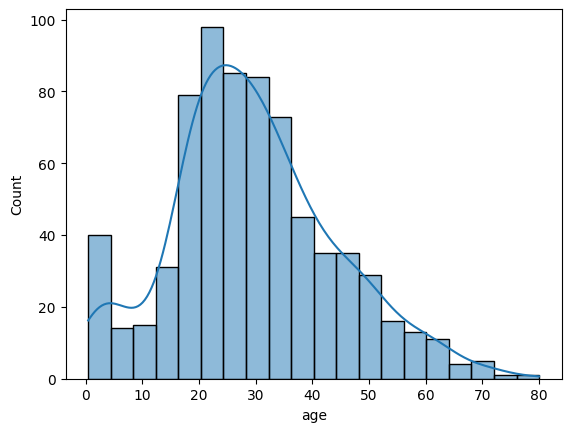

In [47]:
#Imputation Missing Values
#Mean Value Imputation - works well with normally distributed data.

sns.histplot(data["age"], kde=True)

In [48]:
data["Age_mean"]=data["age"].fillna(data["age"].mean().round())

In [49]:
data[["Age_mean","age"]]

,Age_mean,age
0,22.0,22.0
1,38.0,38.0
2,26.0,26.0
3,35.0,35.0
4,35.0,35.0
...,...,...
886,27.0,27.0
887,19.0,19.0
888,30.0,NaN
889,26.0,26.0


In [50]:
#2 Median Value Imputation - data is left/right skewed
data["Age_median"]=data["age"].fillna(data["age"].median().round())
data[["Age_median","Age_mean","age"]]

,Age_median,Age_mean,age
0,22.0,22.0,22.0
1,38.0,38.0,38.0
2,26.0,26.0,26.0
3,35.0,35.0,35.0
4,35.0,35.0,35.0
...,...,...,...
886,27.0,27.0,27.0
887,19.0,19.0,19.0
888,28.0,30.0,NaN
889,26.0,26.0,26.0


In [51]:
data["embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [52]:
data["embarked"].mode()

0    S
Name: embarked, dtype: object

In [53]:
#2 Mode Value Imputation - works with the categorical data
data["embarked_mode"]=data["embarked"].fillna(data["embarked"].mode())
data[["embarked_mode","embarked"]]

,embarked_mode,embarked
0,S,S
1,C,C
2,S,S
3,S,S
4,S,S
...,...,...
886,S,S
887,S,S
888,S,S
889,C,C


In [54]:
#Handling Imbalanced Data

#1 Upsampling
#2 Downsampling

In [ ]:


np.random.seed(42)

n=1000
class_ratio = 0.9

class_1 = int(n*class_ratio)
class_2 = n-class_1

In [56]:
class_1, class_2

(900, 100)

In [57]:
#Creating Data Frame with imbalanced data
class_0 = pd.DataFrame({"feature_1":np.random.normal(loc=0, scale=1, size=class_1), 
                        "feature_2":np.random.normal(loc=0, scale=1, size=class_1),
                        "target":[0]*class_1})

class_1 = pd.DataFrame({"feature_1":np.random.normal(loc=0, scale=1, size=class_2), 
                        "feature_2":np.random.normal(loc=0, scale=1, size=class_2),
                        "target":[1]*class_2})

In [58]:
df = pd.concat([class_0, class_1]).reset_index(drop=True)

In [59]:
df["target"].value_counts()

target
0    900
1    100
Name: count, dtype: int64

In [60]:
#1 Upsampling

df_minority = df[df["target"]==1]
df_majority = df[df["target"]==0]

from sklearn.utils import resample

df_minority_unsampled = resample(df_minority, replace=True, n_samples=len(df_majority))
df_minority_unsampled.shape

(900, 3)

In [62]:
df_upsampled = pd.concat([df_majority, df_minority_unsampled]).reset_index(drop=True)

In [63]:
df_upsampled["target"].value_counts()

target
0    900
1    900
Name: count, dtype: int64

In [64]:
#2 Downsampling

df_minority = df[df["target"]==1]
df_majority = df[df["target"]==0]

from sklearn.utils import resample

df_majority_downsampled = resample(df_majority, replace=False, n_samples=len(df_minority))
df_majority_downsampled.shape

(100, 3)

In [65]:
df_downsampled = pd.concat([df_minority, df_majority_downsampled]).reset_index(drop=True)
df_downsampled.target.value_counts()

target
1    100
0    100
Name: count, dtype: int64

### Handling Imbalanced Dataset using SMOTE (Synthetic Minority Oversampling Technique)

In [66]:
from sklearn.datasets import make_classification

In [80]:
X, Y = make_classification(n_samples=1000, n_features=2, n_clusters_per_class=1, weights=[0.90],
                            random_state=42, n_redundant=0)

In [81]:
df1 = pd.DataFrame(X, columns=["F1", "F2"])
df2 = pd.DataFrame(Y, columns=["Target"])

data = pd.concat([df1, df2], axis=1)
data.head()

,F1,F2,Target
0,1.073546,-1.101339,0
1,0.755945,-1.172352,0
2,1.354479,-0.948528,0
3,3.103090,0.233485,0
4,1.951888,-0.270157,0


In [82]:
data.Target.value_counts()

Target
0    896
1    104
Name: count, dtype: int64

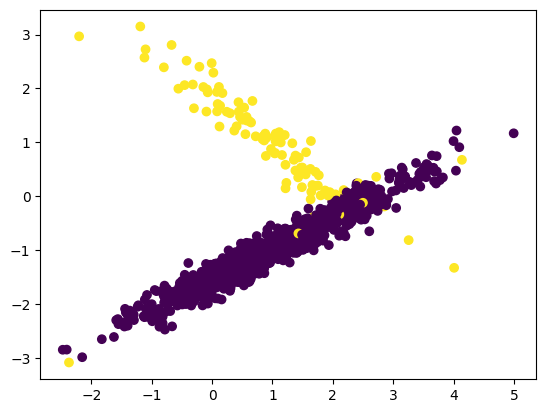

In [88]:
plt.scatter(data["F1"],data["F2"], c=data["Target"])

In [90]:
#!pip install imblearn

In [92]:
from imblearn.over_sampling import SMOTE

In [93]:
oversample = SMOTE()
X,Y = oversample.fit_resample(data[["F1", "F2"]], data["Target"]) 

In [94]:
X.shape

(1792, 2)

In [98]:
Y.shape

(1792,)

In [ ]:
len(Y[Y==0])

896

In [101]:
len(Y[Y==1])

896

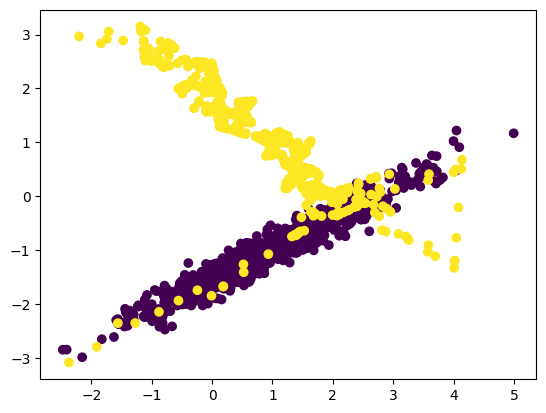

In [102]:
df1 = pd.DataFrame(X, columns=["F1","F2"])
df2 = pd.DataFrame(Y, columns=["Target"])
oversample_data = pd.concat([df1,df2],axis=1)

plt.scatter(oversample_data["F1"],oversample_data["F2"], c=oversample_data["Target"])

### Handling Outliers

In [112]:
marks = [45,32,45,89,45,56,78,98,45,12,45,150, 0]
min,Q1,median,Q3,maximum = np.quantile(marks, [0,0.25,0.5,0.75,1])
min,Q1,median,Q3,maximum

(np.float64(0.0),
 np.float64(45.0),
 np.float64(45.0),
 np.float64(78.0),
 np.float64(150.0))

In [113]:
IQR = Q3-Q1
IQR

np.float64(33.0)

In [114]:
Lower_Fence = Q1 - 1.5*IQR
Upper_Fence = Q3 + 1.5*IQR


<Axes: >

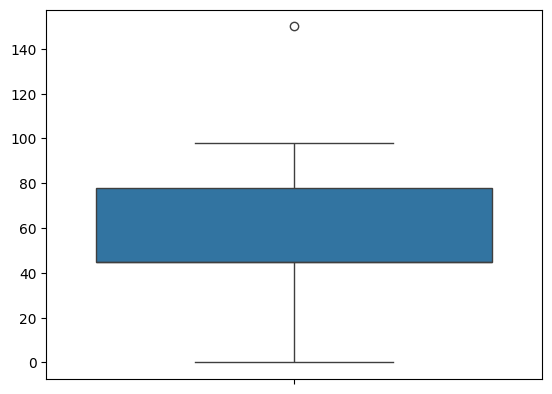

In [115]:
sns.boxplot(marks)

### Data Encoding

In [125]:
#Nominal/OHE Encoding
#Sparse Matrix, which will lead to overfitting

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder

data = pd.DataFrame({"color":["Red","Blue","Green","Yellow","Orange"]})
data.head()

,color
0,Red
1,Blue
2,Green
3,Yellow
4,Orange


In [117]:
OHE = OneHotEncoder()

In [122]:
encoded = OHE.fit_transform(data[["color"]]).toarray()

In [124]:
encoded_df = pd.DataFrame(encoded,columns = OHE.get_feature_names_out())
encoded_df.head()

,color_Blue,color_Green,color_Orange,color_Red,color_Yellow
0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0


In [126]:
#Label Encoding

label = LabelEncoder()

In [131]:
label_encoded = label.fit_transform(data[["color"]])

c:\Users\IP FLEX5\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [133]:
label_encoded

array([3, 0, 1, 4, 2])

In [132]:
label.transform([["Red"]])

c:\Users\IP FLEX5\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


array([3])

In [141]:
data[["color"]]

,color
0,Red
1,Blue
2,Green
3,Yellow
4,Orange


In [142]:
Ordinal = OrdinalEncoder(categories=[["Red","Blue","Green","Yellow","Orange"]])

In [144]:
ordinally_encoded = Ordinal.fit_transform(data[["color"]])
ordinally_encoded

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.]])

### Target Guided Ordinal Encoding

In [149]:
#In Target Guided Ordinal Encoding, we replace each category in the categorical variable
#with a numerical value based on the mean or median of the target variable for that category 
data = pd.DataFrame({"City":["Paris","New York","BLR", "New Delhi", "BLR"],
                     "Rent":[500,68,654,567,890] })

In [150]:
data.head()

,City,Rent
0,Paris,500
1,New York,68
2,BLR,654
3,New Delhi,567
4,BLR,890


In [153]:
mean_price = data.groupby("City")["Rent"].mean().to_dict()
mean_price

{'BLR': 772.0, 'New Delhi': 567.0, 'New York': 68.0, 'Paris': 500.0}

In [155]:
data["City_encoded"] = data["City"].map(mean_price)
data

,City,Rent,City_encoded
0,Paris,500,500.0
1,New York,68,68.0
2,BLR,654,772.0
3,New Delhi,567,567.0
4,BLR,890,772.0


In [158]:
data[["City_encoded", "Rent"]]

,City_encoded,Rent
0,500.0,500
1,68.0,68
2,772.0,654
3,567.0,567
4,772.0,890
